# Topics to cover

- Application of all that we've been doing lately.
----
- Gradient Descent vs Stochastic Gradient Descent
- Data management
- The very many solutions (dataframe, HF datasets, torch datsets, and lists)
----
- Dealing with multiple features
- Scaling features, and preprocessing in general

----

- Solutions beyond PyTorch


In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Setting some pandas display options:
#   - display all columns
pd.set_option('display.max_columns', None)


data = load_breast_cancer()

# Loading data
if True:
    X, Y = data.data, data.target
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2)

print(data.feature_names)
print(data.target_names)

X.shape, Y.shape, X.dtype, Y.dtype, X.__class__

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


((455, 30), (455,), dtype('float64'), dtype('int64'), numpy.ndarray)

In [42]:
# If you want to look at the data and see what it looks like
df = pd.DataFrame(data.data, columns=data.feature_names)
df

# Our dataset has 30 columns, all numeric

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Some helpers

In [43]:
def accuracy(preds, targets) -> float:
    return torch.mean(((preds > 0) == targets).float()).item()

accuracy(torch.tensor([-0.1, 0.6]), torch.tensor([0, 1]))

1.0

In [44]:
def evaluate(model: Callable, x: torch.Tensor | np.ndarray = X_test, y: torch.Tensor | np.ndarray=Y_test) -> float:

    # Ensure X and Y have the right shapes
    if isinstance(x, np.ndarray):
        x = torch.tensor(x, dtype=torch.float)

    if isinstance(y, np.ndarray):
        y = torch.tensor(y, dtype=torch.float)
    if len(y.shape) == 1:
        y = y.unsqueeze(1)

    with torch.no_grad():
        ypred = model(x)
    
    acc = accuracy(ypred, y)
    return acc

In [45]:
# Your turn, train a predictor

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Does it work on unseen data?

In [82]:
# Ok so we fit the data. Memorized it almost. Does it work on new data?
evaluate(model, X_test, Y_test)

0.9649122953414917

# Hah! I did this one too! Give me moar!

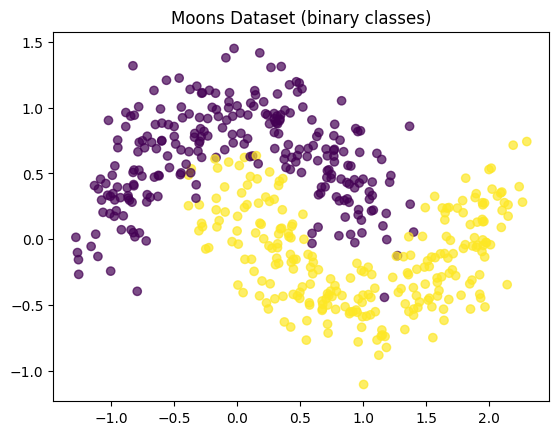

In [30]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.2, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.7)
plt.title("Moons Dataset (binary classes)")
plt.show()


![moar](https://media1.giphy.com/media/WtUgqYulfjEYYXzrFK/giphy.webp?cid=790b7611ztpu5ca57qwi1ef6b83synwzmil3upv3d285r2e9&ep=v1_gifs_search&rid=giphy.webp&ct=g)

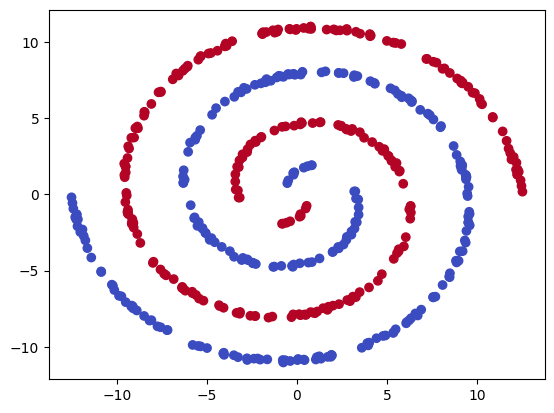

In [32]:
import numpy as np
def generate_spiral(n_samples, noise=0.2):
    n = np.sqrt(np.random.rand(n_samples,1)) * 720 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
    return X, y
X, y = generate_spiral(250)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.show()